In [2]:
import pandas as pd

In [3]:
import glob
import cv2 

In [4]:
import os, cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

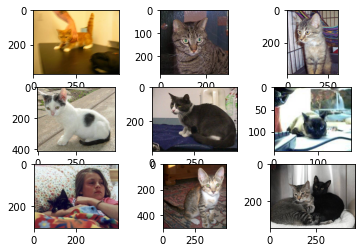

In [5]:
# plot cat photos from the 'dogs vs cats' dataset
folder = 'train2/'

for i in range(9):
#pyplot.subplot(330 + 1 + i)
    pyplot.subplot(3,3,i+1) # dimension of plot
    filename = folder + 'cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

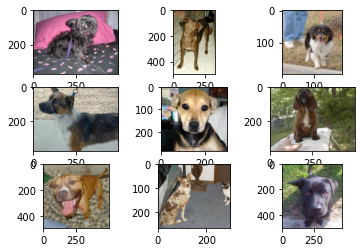

In [6]:
# plot dog photos from the 'dogs vs cats' dataset
folder = 'train2/'

for i in range(9):
  #  pyplot.subplot(330 + 1 + i)
    pyplot.subplot(3,3,i+1)
    filename = folder + 'dog.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

# readImg_gray:

we created function for reading images, change their color and size in order to have a normalized data.

gets file path and returns vector of the resized image in grayScale.
Turning the color to gray and reduce dimensions.


In [7]:
# resize the images and change their color so they will have the same size and colors.
def readImg_gray(file_path):
    img = imread(file_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert an image from one color space to another
    resized_img = cv2.resize(gray_img, (50,57)) 
    return resized_img


try a different thing:

In [30]:
# resize the images and change their color differently using GRAYSCALE
def readImg_grayScale(file_path):
#     img = imread(file_path)
    gray_img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) # convert an image from one color space to another
    resized_img = cv2.resize(gray_img, (50,57)) 
    print(resized_img.shape)
#     resized_img = resized_img.ravel()
    print(resized_img.shape)
    
    return resized_img


In [8]:
# we made this function in order to see which resize values we should use 
def mean_size_photos(label):
    m=12500 #number of cat pictures
    sum_height=0
    sum_width=0
    for i in range (m):
        img = imread('train2/' +label+'.'+str(i)+'.jpg')
        h, w, c = img.shape
#         print(img.size)
#         print('width:  ', w)
#         print('height: ' , h)
        sum_height= sum_height+h
        sum_width= sum_width+w
    mean_height= sum_height/(m-1)
    mean_width = sum_width/(m-1)
    print("mean height of "+ label+ " photos: " +str(mean_height) )
    print("mean width of" + label +  " photos: " +str(mean_width) )

In [8]:
mean_size_photos('cat')

mean height of cat photos: 356.4956396511721
mean width ofcat photos: 410.5554844387551


In [9]:
mean_size_photos('dog')

mean height of dog photos: 364.5182014561165
mean width ofdog photos: 397.70725658052646


so we can resize the images to a size that has approximately the same ratio of (350, 400) - we chose to resize it to (80,100) in order to make it easier for our methods and models to process the data.

goals of resize : get accurate models (the models need to get the same size and color of pictures in order to know how to be trained) and increase efficiency

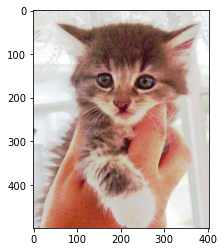

(499, 403, 3)
603291


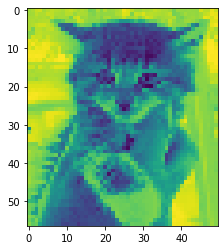

(57, 50)
2850


In [67]:
# an example of how it works 

img = imread('train2/cat.100.jpg')
pyplot.imshow(img)
pyplot.show()
# h, w, c = img.shape
# print('width:  ', w)
# print('length: ' , l)
print(img.shape) 
print(img.size) # rows, columns and depth/number of color channels - always 3, because it contains the degrees of red,blue and green in each image.
# print(len(img))
# print(width(img))
img_gray=readImg_gray('train2/cat.100.jpg')
pyplot.imshow(img_gray)
pyplot.show()
print(img_gray.shape) # rows and columns  - 2 dimensions and depth is 1 because there is only one degree of color - gray
print(img_gray.size)

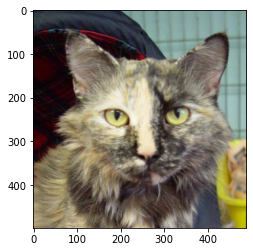

(499, 489, 3)
732033
(57, 50)
(57, 50)


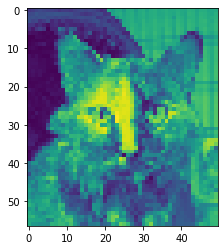

(57, 50)
2850


In [34]:
img = imread('train2/cat.10.jpg')
pyplot.imshow(img)
pyplot.show()
# h, w, c = img.shape
# print('width:  ', w)
# print('length: ' , l)
print(img.shape) 
print(img.size) # rows, columns and depth/number of color channels - always 3, because it contains the degrees of red,blue and green in each image.
# print(len(img))
# print(width(img))
img_gray=readImg_grayScale('train2/cat.10.jpg')
pyplot.imshow(img_gray)
pyplot.show()
print(img_gray.shape) # rows and columns  - 2 dimensions and depth is 1 because there is only one degree of color - gray
print(img_gray.size)




conclusion: 

The depth of the image is 1, but grayscale is actually composed of 2 dimentions: x and y. Color image composed of 3 dimentions. x, y, and depth of 3.

Now, we will use the readImg_gray function we built in order to build a new function, that will create a df of cats and a df of dogs.

# make_df function

In [68]:
def make_df(name, num):    
    m=12500 # num of rows in df ,there are 12500 cat images and 12500 dog images
    size =50*57 # num of columnns in df - image size
    X = np.ndarray((m,size), dtype=np.uint8)
    # 2d array of images - m is the number of inner-arrays i.e the elements of the array, size is the size of each element - image (inner-array)
    y = np.zeros((m,1))
    # 2d array of zeroes - will represent the target column
    folder = 'train2/'
    for i in range(m):
        img = readImg_gray(folder + name+ '.' + str(i) + '.jpg') # read each image
        X[i,:] = np.squeeze(img.reshape((size,1))) # lower dimension of array and reshape so that each image will be a row in the df 
        y[i,0] = num # the label of the data - cat 0 or dog 1
        
        df = pd.DataFrame(X)
        df['label'] = y
        print(X)
    return df

In [69]:
#creating two data frames , one for cat images and the  other for dog images
df_cat = make_df('cat',0)
df_dog = make_df('dog',1)


[[150 158 164 ...   1   1   1]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59  38 ...  53  61  24]
 [ 53  47  69 ...  54  39  24]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[150 158 164 ...   1   1   1]
 [ 43  59

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 16

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103  59 ... 240 229 229]
 [167 170 152 ... 202 207 214]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[112 164 160 ...  79  79  82]
 [101 103

In [70]:
df_cat.ndim

2

In [71]:
df_dog

0    1    2    3    4    5    6    7    8    9  ...  2841  2842  \
0      112  164  160  133  124  135  143  143  139  144  ...    94   152   
1      101  103   59   81   89   71   94   87   91   87  ...   230   239   
2      167  170  152  177  178  175  179  173  155  141  ...   193   193   
3      224  211  190  207  216  210  211  231  220  246  ...   167   168   
4      148  146  149  151  152  155  149  143  144  139  ...   180   161   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
12495   33   50   82   49   25   23   22   51   56   70  ...   125   125   
12496   36   58   39   24   65  109  107  252  254  254  ...   132    81   
12497  207  149   92   54  113  110  146  146  131  118  ...   100    88   
12498  206  214  217  219  221  224  225  226  227  229  ...    61    82   
12499  198  196  195  199  199  203  204  200  191  196  ...    23    21   

       2843  2844  2845  2846  2847  2848  2849  label  
0        91    84    75    77    79    79    82    1.0  
1       243   239   239   243   240   229   229    1.0  
2       187   190   193   198   202   207   214    1.0  
3       169   166   167   171   172   167   170    1.0  
4       157   140   119    64    62    33    42    1.0  
...     ...   ...   ...   ...   ...   ...   ...    ...  
12495   127   130   129   123   125   122   100    1.0  
12496   103   108   131   110   118    78    50    1.0  
12497    66   158   159   165   151   155   161    1.0  
12498    65    42    40    54    43    40    42    1.0  
12499    20    19   104    72    54    84   108    1.0  

[12500 rows x 2851 columns]

# making the df of cats and dogs

In [38]:
# concating the two dfs
df = pd.concat([df_cat, df_dog])
df.shape

(25000, 2851)

In [39]:
# dropping the target column from X
y = df['label']
X = df.drop(['label'], axis=1).to_numpy()

In [40]:
X.shape

(25000, 2850)

In [41]:
y.shape

(25000,)

In [42]:
X

array([[172, 180, 186, ...,   2,   2,   2],
       [ 43,  58,  38, ...,  57,  65,  27],
       [ 54,  48,  69, ...,  53,  36,  25],
       ...,
       [217, 132,  79, ..., 161, 163, 170],
       [208, 216, 219, ...,  78,  73,  56],
       [203, 201, 200, ...,  68,  95, 116]], dtype=uint8)

In [43]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12495    1.0
12496    1.0
12497    1.0
12498    1.0
12499    1.0
Name: label, Length: 25000, dtype: float64

In [44]:
df

0    1    2    3    4    5    6    7    8    9  ...  2841  2842  \
0      172  180  186  191  197  202  204  208  211  215  ...    12    12   
1       43   58   38   40   47   34   38   38   41   44  ...    61    90   
2       54   48   69   98   90  197  202  159   91   73  ...    83    62   
3      167  176  196  196  124  123  136  200  203  205  ...   132   122   
4      145  163  170  173  178  181  181  185  184  187  ...     9    11   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
12495   34   47   81   48   25   24   23   50   55   69  ...   131   132   
12496   36   58   40   26   63  105  103  250  254  254  ...   130    77   
12497  217  132   79   46  102   96  129  129  115  101  ...   110    96   
12498  208  216  219  221  223  226  227  228  229  231  ...    63    91   
12499  203  201  200  204  204  207  208  204  195  200  ...    26    22   

       2843  2844  2845  2846  2847  2848  2849  label  
0         9     4     4     2     2     2     2    0.0  
1        57    38    49    60    57    65    27    0.0  
2        48    54    47    31    53    36    25    0.0  
3       207   126   173   179   208   140   176    0.0  
4        11    11    12     9    10    11    10    0.0  
...     ...   ...   ...   ...   ...   ...   ...    ...  
12495   134   137   136   129   131   128   104    1.0  
12496   100   105   130   107   118    76    56    1.0  
12497    66   169   169   175   161   163   170    1.0  
12498   101    77    75    91    78    73    56    1.0  
12499    19    22   112    81    68    95   116    1.0  

[25000 rows x 2851 columns]

# train test split

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
# מוסכמה - דאטא מבחן 10 אחוז, ראנדום סטייט=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42, shuffle = True)

In [93]:
#######################


# scale_pipeline = Pipeline([
#  ("std_scaler", StandardScaler()),
#  ("pca", PCA(n_components=0.90, random_state=0,svd_solver='full')),
# ])
# x_train_reduced = scale_pipeline.fit_transform(X_train)
# x_test_reduced = scale_pipeline.transform(X_test)

In [94]:
X_train.shape


(22500, 2850)

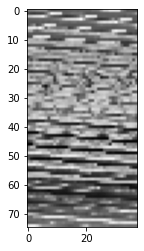

In [95]:
plt.imshow(X_train[30].reshape(75,38),cmap="gist_yarg")

# Scaling

In [96]:
def scale(X_train, X_test, X_test_Final):
    min_max_scaler = MinMaxScaler()
    X_train_scaled = pd.DataFrame(min_max_scaler.fit_transform(X_train.values)) #fitting and transforming on train data
    X_test_scaled = pd.DataFrame(min_max_scaler.transform(X_test.values)) #only transforming the test and validation sets
    X_test_Final = pd.DataFrame(min_max_scaler.transform(X_test_Final.values))
    return X_train, X_test, X_test_Final

X_train, X_test, X_test_Final = scale(X_train, X_test, X_test_Final)

NameError: name 'X_test_Final' is not defined

# PCA

In [97]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

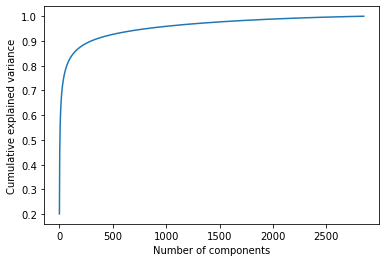

In [98]:
pca = PCA()
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced=pca.transform(X_test)
variances = pca.explained_variance_ratio_
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.plot(np.cumsum(variances))
# plt.plot([0,300],[0.75,0.75],'k-',lw=1)
plt.savefig('expained_variance.jpg')
plt.show()

In [101]:
#  we will set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance we wish to preserve
pca = PCA(n_components=0.92)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced=pca.transform(X_test)
variances = pca.explained_variance_ratio_



we chose the first way since it has less dimentions so it will be easier to train the data and also there is still a lot of variance in the data - 90%, so we didn't lose a lot of information.

In [102]:
print("number of dimensions", X_train_reduced.shape[1])

number of dimensions 437


In [103]:
X_train.shape

(22500, 2850)

In [84]:
y_train.shape

(22500,)

In [85]:
# we chose 299 components out of 784
X_train_reduced.shape

(22500, 298)

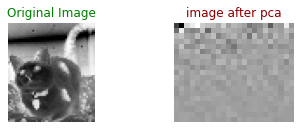

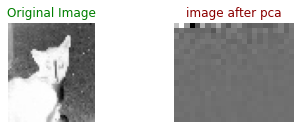

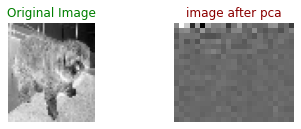

In [104]:
for i in range(3):
    plt.figure(figsize=(6,4))
    plt.subplot(2, 2, 1)
    plt.imshow(X_train[i].reshape(57,50), cmap="gist_yarg")
    plt.title("Original Image", color = "green")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.imshow(X_train_reduced[i].reshape(19,23), cmap="gist_yarg")
    plt.title("image after pca", color = "Darkred")
    plt.axis("off")
    plt.show()

In [105]:

X_reduced = pca.fit_transform(X_train)
X_train_reduced.shape

(22500, 437)

In [106]:
# in order to use visualization we need to return to 784 dimensions
# let's show the dimensial reduction didn't ruin the data
X_recovered = pca.inverse_transform(X_train_reduced)

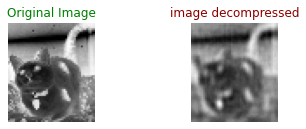

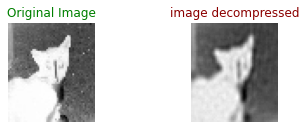

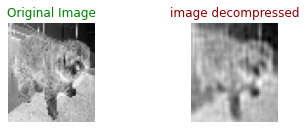

In [108]:
for i in range(3):
    plt.figure(figsize=(6,4))
    plt.subplot(2, 2, 1)
    plt.imshow(X_train[i].reshape(57,50), cmap="gist_yarg")
    plt.title("Original Image", color = "green")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.imshow(X_recovered[i].reshape(57,50), cmap="gist_yarg")
    plt.title("image decompressed", color = "Darkred")
    plt.axis("off")
    plt.show()

In [70]:
# # scaling and fit transform
# scale_pipeline = Pipeline([
#  ("std_scaler", StandardScaler()),
#  ("pca", PCA(n_components=0.90, random_state=0,svd_solver='full')),
# ])
# x_train_reduced = scale_pipeline.fit_transform(X_train)
# x_test_reduced = scale_pipeline.transform(X_test)

# CLUSTERING AS PREPROCCESING

# Using Clustering for Preprocessing - K MEANS 

 Although it is tempting to define the number of clusters to 2 , since an image is either a cat or a dog, there are so many different types of cats and dogs so we shouldn't define only 2 clusters.

In [109]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# kmeans =KMeans(n_clusters=70,random_state=42).fit(X_train)

In [ ]:
# len(kmeans.labels_)

In [ ]:
# silhouette_score=silhouette_score(X_train, kmeans.labels_)

In [ ]:
#  # silhouette score
# silhouette_avg = []
# silhouette_avg.append(silhouette_score(X_train, kmeans.labels_))
# plt.plot(kmeans.labels_,silhouette_avg,'bx-')
# plt.xlabel('Values of K') 
# plt.ylabel('Silhouette score') 
# plt.title('Silhouette analysis For Optimal k')
# plt.show()

In [ ]:
# it theres time, add a validation for k means

In [110]:
from sklearn.pipeline import Pipeline

# function that will help us to see how well the models perform with k-means as a dimensionality reduction tool
def kmeans_with_model(str_name_model,model):
    kmeans= KMeans(n_clusters=70,random_state=42)
    pipeline = Pipeline([
     ("kmeans",kmeans),
     (str_name_model, model)
    ])
    
    pipeline.fit(X_train, y_train)
#     if(str_name_model=='log_reg'):
#         print("number of max iterations:"+ str_name_model.n_iter_)
    print(kmeans.labels_)
    return pipeline


# dummy model

In [111]:

from sklearn.dummy import DummyClassifier
# defining the strategy
dummy_clf = DummyClassifier(strategy="most_frequent")
# dummy_clf = DummyClassifier(strategy="stratified")

dummy_clf.fit(X_train_reduced, y_train)

y_pred = dummy_clf.predict_proba(X_test_reduced)

# #accuracy
dummy_clf.score(y_pred, y_test)

0.4808

since The classifier always predicts the most frequent class label in the training data, it means that our data is almost 100% balanced.

# Models

the models we chose:

   logistic regression
   
   decision tree
   
   SVC
    
   adaboost
   
   voting (ensemble)
   

   bagging?
   
 
    
    

#  GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

# logistic regression

without pca

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
# C : float, default=1.0
#     Inverse of regularization strength; must be a positive float.
#     Like in support vector machines, smaller values specify stronger
#     regularization.
log_reg = LogisticRegression(max_iter=400, solver='sag',random_state=42, C=0.1)
log_reg=log_reg.fit(X_train, y_train)

In [93]:
# C : float, default=1.0
#     Inverse of regularization strength; must be a positive float.
#     Like in support vector machines, smaller values specify stronger
#     regularization.
log_reg = LogisticRegression(max_iter=200, solver='sag',random_state=42)
log_reg=log_reg.fit(X_train, y_train)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [94]:
log_reg.score(X_train, y_train)

0.6599111111111111

with pca

In [95]:
log_reg_pca= log_reg.fit(X_train_reduced,y_train)
log_reg_pca.score(X_train_reduced,y_train)

0.5883111111111111

with k-means

we are calling the function , that will return us the pipeline that will first cluster the
training set into 50 clusters and replace the images with their distances to these 50
clusters, then apply a logistic regression model

In [79]:

log_reg_kmeans=kmeans_with_model("log_reg",LogisticRegression(solver='sag',random_state=42))

[39 44  5 ...  6 65 52]


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [80]:
# log_reg_

In [81]:
log_reg_kmeans.score(X_train,y_train)

0.6064444444444445

In [82]:
# find_best_k(X_train)

cross validation

In [96]:
#without pca
scores_log =cross_val_score(log_reg, X_train, y_train, cv=3,scoring='roc_auc_ovr')

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [84]:
#with pca
scores_pca_log =cross_val_score(log_reg_pca, X_train_reduced, y_train, cv=3, scoring='accuracy')

In [85]:
scores_kmeans_log=cross_val_score(log_reg_kmeans, X_train, y_train, cv=3, scoring='accuracy')

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [97]:
print("CV mean accuracy score witout pca is: " + str(scores_log.mean()))

CV mean accuracy score witout pca is: 0.5244888888888889


In [87]:
print("CV mean accuracy score with pca is: " + str(scores_pca_log.mean()))

CV mean accuracy score with pca is: 0.5571111111111112


In [88]:
print("CV mean accuracy score with kmeans is: " + str(scores_kmeans_log.mean()))

CV mean accuracy score with kmeans is: 0.5996888888888888


In [89]:
log_reg.n_iter_

array([38])

In [ ]:
log_reg_pca.n_iter_

In [ ]:
log_reg_kmeans.n_iter_

In [ ]:
# y_pred_log = log_reg.predict_proba(X_test_reduced)

# # #accuracy
# log_reg.score(y_pred_log, y_test)

# decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# pruning the tree with ccp_alpha
clf_dt = DecisionTreeClassifier(ccp_alpha=0.001, max_depth=2)

without pca

In [ ]:
clf_dt=clf_dt.fit(X_train, y_train)

In [ ]:
clf_dt.score(X_train,y_train)

after pca

In [ ]:
clf_dt_pca=clf_dt.fit(X_train_reduced,y_train)

In [ ]:
clf_dt_pca.score(X_train_reduced,y_train)

cross validation

In [ ]:
# without pca
scores_dt =cross_val_score(clf_dt, X_train, y_train, cv=3, scoring='accuracy')

In [ ]:
#with pca
scores_dt_pca =cross_val_score(clf_dt_pca, X_train_reduced, y_train, cv=3, scoring='accuracy')

In [ ]:
print("CV mean accuracy score without pca is: " + str(scores_dt.mean()))

In [ ]:
print("CV mean accuracy score with pca is: " + str(scores_dt_pca.mean()))

# Ensemble Learning Methods

# Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

without pca

In [ ]:
 # reduce number of estimators
clf_ada = AdaBoostClassifier(n_estimators=100, random_state=42)
clf_ada.fit(X_train, y_train)

In [ ]:
clf_ada.score(X_train, y_train)

with pca

In [ ]:
clf_ada_pca=clf_ada.fit(X_train_reduced, y_train)

In [ ]:
clf_ada_pca.score(X_train_reduced, y_train)

with kmeans

In [ ]:
clf_ada_kmeans=kmeans_with_model("clf_ada",clf_ada)

In [ ]:
clf_ada_kmeans.score(X_train, y_train)

cross validation:

In [ ]:
# Note that cross-validation is an accuracy evaluation method, while AdaBoost is an accuracy improvement method. In the method I suggested above, cross-validation is used to retain the best classifier obtained from AdaBoost (in terms of accuracy), and discarding other classifiers.

In [ ]:
scores_ada =cross_val_score(clf_ada, X_train, y_train, cv=3, scoring='accuracy')
print("CV mean accuracy score witout pca or kmeans is: " + str(scores_ada.mean()))

In [ ]:
print(scores_ada)

In [ ]:
scores_pca_ada =cross_val_score(clf_ada_pca, X_train_reduced, y_train, cv=3, scoring='accuracy')
print("CV mean accuracy score with pca is: " + str(scores_pca_ada.mean()))

In [ ]:
print(scores_pca_ada)

In [ ]:
scores_kmeans_ada=cross_val_score(clf_ada_kmeans, X_train, y_train, cv=3, scoring='accuracy')
print(scores_kmeans_ada)
print("CV mean accuracy score with kmeans is: " + str(scores_kmeans_ada.mean()))

In [ ]:
predictions=clf_ada_pca.predict(X_test_reduced)

In [ ]:
predictions

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
clf_ada.score(X_test,y_test)

In [ ]:
# clf_ada_pca.score(X_test_reduced,y_test)

In [ ]:
#gradient boosting -  low learning rate

# Gradient Boosting

In [167]:
from sklearn.ensemble import GradientBoostingClassifier

In [168]:
clf_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
clf_GB.score(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
# lowering the learning rate, in order to put more weight on the missclassified points, so that the model will generelize better.

In [ ]:
# clf_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.8,max_depth=1, random_state=0).fit(X_train, y_train)
# clf_GB.score(X_train,y_train)

In [ ]:
# another thing we can do is change the n_estimators. we don't want too much because the model wil overfit the training set, but we also don't want too little.

In [169]:
# withour pca , n_estimators=150, learning_rate=0.1, DIFFERENT  AND MAX_DEPTH=3
clf_GB = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1,max_depth=3, random_state=0).fit(X_train, y_train)
clf_GB.score(X_train,y_train)

0.7407111111111111

In [ ]:
# generalize better
clf_GB = GradientBoostingClassifier(n_estimators=150, learning_rate=0.5,max_depth=1, random_state=0).fit(X_train, y_train)
clf_GB.score(X_train,y_train)

In [ ]:
# with pca , n_estimators=150, learning_rate=1.0
clf_GB_pca= GradientBoostingClassifier(n_estimators=150, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train_reduced, y_train)
clf_GB_pca.score(X_train_reduced,y_train) 

In [ ]:
# with pca , n_estimators=150, learning_rate=1.0 , DIFFERENT RANDOM STATE AND MAX_DEPTH=2
clf_GB_pca= GradientBoostingClassifier(n_estimators=150, learning_rate=1.0,max_depth=2, random_state=42).fit(X_train_reduced, y_train)
clf_GB_pca.score(X_train_reduced,y_train) 

In [ ]:
# with pca , n_estimators=150,  notice !!!!!! learning_rate=0.5 , DIFFERENT RANDOM STATE AND MAX_DEPTH =2
clf_GB_pca_lrate= GradientBoostingClassifier(n_estimators=150, learning_rate=0.5,max_depth=2, random_state=42).fit(X_train_reduced, y_train)
clf_GB_pca_lrate.score(X_train_reduced,y_train) 

In [ ]:
X_test_reduced.shape

In [ ]:
y_test.shape

In [ ]:
y_pred_xg

In [ ]:
y_pred_xg=y_pred_xg.reshape(1, -1)

In [ ]:
y_pred_xg

In [ ]:
y_pred_xg=clf_xg_pca_lrate.predict(X_test_reduced)

# # y_pred_xg=y_pred_xg.reshape(1,-1)
# # #accuracy
# clf_xg_pca_lrate.score(y_pred_xg, y_test)

In [ ]:
# from sklearn.metrics import plot_confusion_matrix,classification_report
# y_pred_xg=clf_xg_pca.predict(X_test_reduced)
# plot_confusion_matrix(clf_xg_pca,X_train_reduced,y_train)

# print(classification_report(y_test,y_pred_xg))
# # metrics.accuracy_score(Y_test, y_predictknn)

# # clf_xg_pca

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report
y_pred_GB=clf_xg_pca_lrate.predict(X_test_reduced)
plot_confusion_matrix(clf_GB_pca_lrate,X_train_reduced,y_train)

print(classification_report(y_test,y_pred_GB))
# metrics.accuracy_score(Y_test, y_predictknn)

In [ ]:
scores_xg_pca =cross_val_score(clf_xg_pca, X_train_reduced, y_train, cv=3, scoring='accuracy')
print("CV mean accuracy score with pca is: " + str(scores_xg_pca.mean()))

In [ ]:
scores_xg_pca =cross_val_score(clf_xg_pca, X_train_reduced, y_train, cv=8, scoring='accuracy')
print("CV mean accuracy score with pca is: " + str(scores_xg_pca.mean()))

In [ ]:
print(scores_xg_pca)

# XGBoost

In [113]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic",n_estimators=100,learning_rate=0.5,max_depth=2 , random_state=42, eval_metric="auc")

In [114]:
# xgb_reg.fit(X_train_reduced, y_train)
# y_pred = xgb_reg.predict(X_val)

xgb_model.fit(X_train_reduced, y_train, early_stopping_rounds=5, eval_set=[(X_test_reduced, y_test)])

[0]	validation_0-auc:0.54839
[1]	validation_0-auc:0.57031
[2]	validation_0-auc:0.58994
[3]	validation_0-auc:0.59936
[4]	validation_0-auc:0.60899
[5]	validation_0-auc:0.60946
[6]	validation_0-auc:0.62114
[7]	validation_0-auc:0.62426
[8]	validation_0-auc:0.62724
[9]	validation_0-auc:0.62964
[10]	validation_0-auc:0.63345
[11]	validation_0-auc:0.63218
[12]	validation_0-auc:0.63155
[13]	validation_0-auc:0.63313
[14]	validation_0-auc:0.63745
[15]	validation_0-auc:0.63965
[16]	validation_0-auc:0.63677
[17]	validation_0-auc:0.63507
[18]	validation_0-auc:0.63815
[19]	validation_0-auc:0.63844
[20]	validation_0-auc:0.64036
[21]	validation_0-auc:0.64085
[22]	validation_0-auc:0.64272
[23]	validation_0-auc:0.64507
[24]	validation_0-auc:0.64328
[25]	validation_0-auc:0.64180
[26]	validation_0-auc:0.64280
[27]	validation_0-auc:0.64320
[28]	validation_0-auc:0.64357


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [159]:
xgb_model_auc = xgb.XGBClassifier( early_stopping_rounds=5,objective="binary:logistic",n_estimators=100,min_child_weight = 1,max_depth = 3 , random_state=42,learning_rate=0.1,gamma = 0, subsample=0.8,colsample_bytree = 0.8 ,scale_pos_weight = 1, eval_metric="auc")

In [160]:
xgb_model_auc.fit(X_train_reduced, y_train,eval_set=[(X_test_reduced, y_test)])

[0]	validation_0-auc:0.56114
[1]	validation_0-auc:0.55547
[2]	validation_0-auc:0.58000
[3]	validation_0-auc:0.60910
[4]	validation_0-auc:0.61395
[5]	validation_0-auc:0.61733
[6]	validation_0-auc:0.62312
[7]	validation_0-auc:0.62195
[8]	validation_0-auc:0.62320
[9]	validation_0-auc:0.62692
[10]	validation_0-auc:0.62549
[11]	validation_0-auc:0.62646
[12]	validation_0-auc:0.62826
[13]	validation_0-auc:0.63069
[14]	validation_0-auc:0.63382
[15]	validation_0-auc:0.63374
[16]	validation_0-auc:0.63327
[17]	validation_0-auc:0.63339
[18]	validation_0-auc:0.63493
[19]	validation_0-auc:0.63818
[20]	validation_0-auc:0.63853
[21]	validation_0-auc:0.63749
[22]	validation_0-auc:0.63948
[23]	validation_0-auc:0.63967
[24]	validation_0-auc:0.64079
[25]	validation_0-auc:0.64078
[26]	validation_0-auc:0.64152
[27]	validation_0-auc:0.64324
[28]	validation_0-auc:0.64275
[29]	validation_0-auc:0.64621
[30]	validation_0-auc:0.64676
[31]	validation_0-auc:0.64750
[32]	validation_0-auc:0.64843
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=5, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
# xgb_reg.fit(X_train, y_train,
#  eval_set=[(X_val, y_val)], early_stopping_rounds=2)
# y_pred = xgb_reg.predict(X_val)

In [164]:
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.65      0.58      0.61      1298
         1.0       0.60      0.66      0.63      1202

    accuracy                           0.62      2500
   macro avg       0.62      0.62      0.62      2500
weighted avg       0.62      0.62      0.62      2500



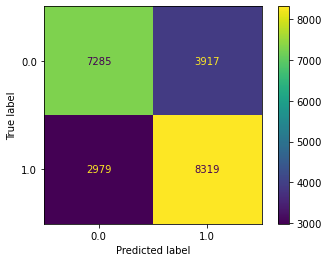

In [166]:
# xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])

y_pred_xg = xgb_model_auc.predict(X_test_reduced)

plot_confusion_matrix(xgb_model_auc,X_train_reduced,y_train)
print(classification_report(y_test,y_pred_xg))
# metrics.accuracy_score(y_test, y_pred_xg)



# accuracy_score(y_test, y_pred)

# Voting Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC


In [ ]:
log_clf = LogisticRegression(solver='sag')
dt_clf = DecisionTreeClassifier()
svm_clf = SVC()


without pca:

In [ ]:
voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', dt_clf), ('svc', svm_clf)],
 voting='soft')
voting_clf.fit(X_train, y_train)


In [ ]:
voting_clf_hard = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', dt_clf), ('svc', svm_clf)],
 voting='hard')
voting_clf_hard.fit(X_train, y_train)


In [ ]:
# voting_clf.score(X_train, y_train)

with pca:

In [ ]:
voting_clf_pca=voting_clf.fit(X_train_reduced, y_train)

In [ ]:
voting_clf_pca.score(X_train_reduced, y_train)

In [ ]:
#this model may overfit, since we've seen that the other models had a score that is between 50 to 60 percent.
# the solution - cross validation

In [ ]:
scores_voting =cross_val_score(voting_clf, X_train, y_train, cv=3, scoring='accuracy')
print("CV mean accuracy score witout pca or kmeans is: " + str(scores_voting.mean()))

In [ ]:
scores_voting_pca =cross_val_score(voting_clf_pca, X_train_reduced, y_train, cv=3, scoring='accuracy')
print("CV mean accuracy score with pca is: " + str(scores_voting_pca.mean()))

In [ ]:
scores_voting_kmeans =cross_val_score(clf_ada_kmeans, X_train, y_train, cv=3, scoring='accuracy')
print("CV mean accuracy score with kmeans is: " + str(scores_pca_ada.mean()))

with kmeans

In [ ]:
voting_clf_kmeans=kmeans_with_model("voting_clf",voting_clf)

In [ ]:
voting_clf_kmeans.score(X_train, y_train)

cross validation

In [ ]:
scores_voting_clf =cross_val_score(voting_clf, X_train, y_train, cv=3, scoring='accuracy')

In [ ]:
scores_voting_clf_pca =cross_val_score(voting_clf, X_train_reduced, y_train, cv=3, scoring='accuracy')

In [ ]:
print("CV mean accuracy score witout pca is: " + str(scores_voting_clf.mean()))

In [ ]:
print("CV mean accuracy score with pca is: " + str(scores_voting_clf_pca.mean()))

# Bagging

In [107]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [108]:
clf_bag = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=100,
 max_samples=100, bootstrap=True, n_jobs=-1,random_state=0)
clf_bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(), max_samples=100, n_estimators=100,
                  n_jobs=-1, random_state=0)

In [110]:
clf_bag.score(X_train,y_train)

0.5980444444444445

In [ ]:
clf_bag_pca=clf_bag.fit(X_train_reduced,y_train)

In [ ]:
clf_bag_pca.score(X_train_reduced,y_train)

In [ ]:
print("CV mean accuracy score without pca is: " + str(clf_bag.mean()))

In [ ]:
print("CV mean accuracy score with pca is: " + str(clf_bag_pca.mean()))

* we can get better results if we will resize and color the photos differentlym